In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import cv2
import random

In [2]:
# VoTT のエクスポートファイルや、画像が格納されているディレクトリ
BASE_DIRECTORY = './vott-json-export/'
# VoTT のエクスポートファイル名
EXPORT_FILENAME = 'Machikado-export.json'
# 訓練データに使用する割合
TRAIN_RATIO = 0.8
# 乱数シード
RANDOM_STATE = 0

### DatasetCatalogを用意する

In [3]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from Machikado_vott import get_cat_names, get_machikado_dicts

# vott エクスポートファイルの読み込み
CAT_NAME2ID, CAT_ID2NAME = get_cat_names(os.path.join(BASE_DIRECTORY, EXPORT_FILENAME))
dataset_dicts = get_machikado_dicts(os.path.join(BASE_DIRECTORY, EXPORT_FILENAME), BASE_DIRECTORY, CAT_NAME2ID)

警告: name: 59.jpg - 画像サイズの不整合 image_size:(268, 201), ./vott-json-export/Machikado-export.json: (600, 600)


---
## 学習

In [4]:
from detectron2.config import get_cfg
from custom_config import get_custom_cfg

cfg = get_cfg()
cfg.MODEL.MASK_ON = True

cfg.INPUT.CROP.ENABLED = True
cfg.INPUT.CROP.SIZE = [0.8, 0.8]

custom_cfg = get_custom_cfg()

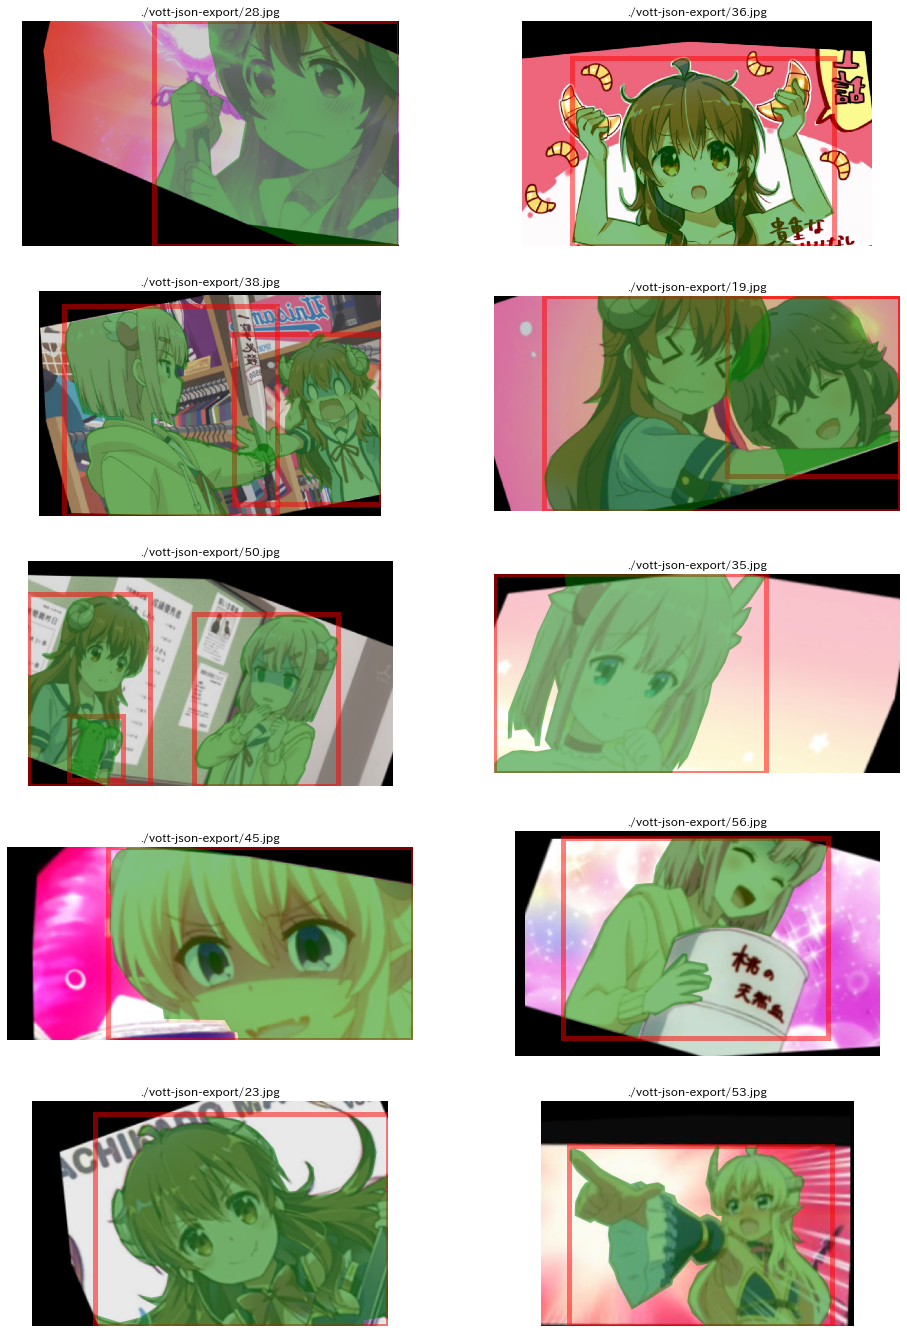

In [5]:
from MachikadoDatasetMapper import MachikadoDatasetMapper
from plot_dataset_mapper import plot_dataset_mapper

# random.seed(RANDOM_STATE)

mapper = MachikadoDatasetMapper(cfg, custom_cfg=custom_cfg, is_train=True)

plot_dataset_mapper(dataset_dicts, mapper)